<a href="https://colab.research.google.com/github/Rubnserrano/KAGGLE_-projects/blob/main/dog_breeds_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Download

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle


In [4]:
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json


In [6]:
! kaggle datasets download -d gpiosenka/70-dog-breedsimage-data-set


 99% 212M/215M [00:02<00:00, 89.5MB/s]
100% 215M/215M [00:02<00:00, 89.6MB/s]


In [7]:
!ls

70-dog-breedsimage-data-set.zip  kaggle.json  sample_data


##Extract files

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('70-dog-breedsimage-data-set.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [9]:
!ls

70-dog-breedsimage-data-set.zip  kaggle.json  test   valid
dogs.csv			 sample_data  train


#Data previsualization

In [ ]:
import pandas as pd
dogs = pd.read_csv('dogs.csv')
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9346 entries, 0 to 9345
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  9346 non-null   object
 1   labels     9346 non-null   object
 2   data set   9346 non-null   object
dtypes: object(3)
memory usage: 219.2+ KB


In [13]:
import os
for dirpath, dirnames, filenames in os.walk('train'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


There are 70 directories and 0 images in train
There are 0 directories and 99 images in train/Basenji
There are 0 directories and 105 images in train/Bichon Frise
There are 0 directories and 79 images in train/Bearded Collie
There are 0 directories and 114 images in train/Collie
There are 0 directories and 100 images in train/Elk Hound
There are 0 directories and 112 images in train/Border Collie
There are 0 directories and 128 images in train/Bull Mastiff
There are 0 directories and 130 images in train/Pit Bull
There are 0 directories and 83 images in train/Coyote
There are 0 directories and 109 images in train/Greyhound
There are 0 directories and 81 images in train/Vizsla
There are 0 directories and 127 images in train/Golden Retriever
There are 0 directories and 78 images in train/Newfoundland
There are 0 directories and 149 images in train/Pomeranian
There are 0 directories and 108 images in train/Chihuahua
There are 0 directories and 113 images in train/Corgi
There are 0 director

#Creating Datasets

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = '/content/train/'
test_dir = '/content/test/'
val_dir = '/content/valid/'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

print('Training images:')
train_data_dogs = train_datagen.flow_from_directory(train_dir,
                                                    target_size = IMG_SHAPE,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical')
print('Validation images:')
val_data_dogs = val_datagen.flow_from_directory(val_dir,
                                                    target_size = IMG_SHAPE,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical')


print('testing images:')
test_data_dogs = test_datagen.flow_from_directory(test_dir,
                                                    target_size = IMG_SHAPE,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical')

Training images:
Found 7946 images belonging to 70 classes.
Validation images:
Found 700 images belonging to 70 classes.
testing images:
Found 700 images belonging to 70 classes.


In [43]:
train_data_dogs??

#Visualizing random images

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print(img)

  print(f'Image shape: {img.shape}')


[[[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [ 88  79  80]
  [ 77  68  69]
  [ 74  65  66]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [ 83  74  75]
  [ 71  62  63]
  [ 79  71  69]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [ 81  76  73]
  [ 92  84  82]
  [ 73  65  63]]

 ...

 [[239 239 239]
  [245 245 245]
  [249 249 249]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[250 252 251]
  [247 249 248]
  [243 243 243]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[250 252 251]
  [247 249 248]
  [245 247 246]
  ...
  [252 252 252]
  [252 252 252]
  [253 253 253]]]
Image shape: (224, 224, 3)


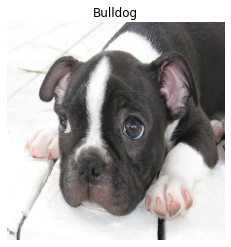

In [41]:
view_random_image(target_dir = '/content/train/',target_class = 'Bulldog')

[[[ 19  11   9]
  [ 11   3   1]
  [ 60  50  49]
  ...
  [ 36  17  11]
  [ 41  20  15]
  [ 45  24  19]]

 [[ 16   8   6]
  [ 14   6   4]
  [ 66  56  55]
  ...
  [ 42  22  15]
  [ 49  26  20]
  [ 55  32  26]]

 [[ 15   7   5]
  [ 19  11   9]
  [ 69  59  58]
  ...
  [ 51  29  18]
  [ 56  32  22]
  [ 63  36  25]]

 ...

 [[ 80  73  80]
  [ 80  73  80]
  [ 81  74  82]
  ...
  [ 91  81  82]
  [102  90  92]
  [110  95  98]]

 [[ 92  82  91]
  [ 87  77  86]
  [ 81  71  80]
  ...
  [ 85  74  82]
  [ 93  80  90]
  [ 97  81  94]]

 [[111  98 108]
  [103  90 100]
  [ 93  79  92]
  ...
  [ 81  69  81]
  [ 85  71  86]
  [ 86  69  87]]]
Image shape: (224, 224, 3)


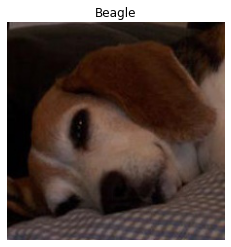

In [32]:
view_random_image(target_dir = '/content/train/',target_class = 'Beagle')

Image shape: (224, 224, 3)


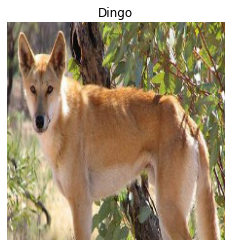

In [16]:
view_random_image(target_dir = '/content/train/',target_class = 'Dingo')

#Model Baseline

In [1]:
!nvidia-smi

Wed Nov  2 22:09:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model1 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(70, activation = 'softmax')
])

model1.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history1 = model1.fit(train_data_dogs,
                      epochs=5,
                      steps_per_epoch = len(train_data_dogs),
                      validation_data = val_data_dogs,
                      validation_steps = len(val_data_dogs))

Epoch 1/5
249/249 [==============================] - 29s 81ms/step - loss: 4.1574 - accuracy: 0.0357 - val_loss: 3.9964 - val_accuracy: 0.0600
Epoch 2/5
249/249 [==============================] - 20s 81ms/step - loss: 3.4703 - accuracy: 0.1704 - val_loss: 3.7190 - val_accuracy: 0.1443
Epoch 3/5
249/249 [==============================] - 19s 77ms/step - loss: 1.6129 - accuracy: 0.5934 - val_loss: 4.9762 - val_accuracy: 0.1529
Epoch 4/5
249/249 [==============================] - 20s 79ms/step - loss: 0.2345 - accuracy: 0.9407 - val_loss: 8.5682 - val_accuracy: 0.1500
Epoch 5/5
249/249 [==============================] - 19s 77ms/step - loss: 0.0388 - accuracy: 0.9941 - val_loss: 10.1281 - val_accuracy: 0.1486


In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

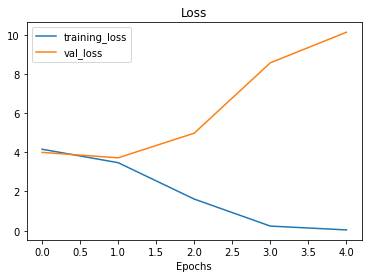

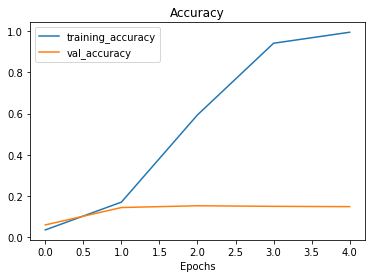

In [20]:
plot_loss_curves(history1)

## We try to reduce overfitting by

##**Regularization**

In [21]:
from tensorflow.python.keras import regularizers


In [22]:
model2 = tf.keras.Sequential([
    Conv2D(64, (4,4), activation = 'relu', input_shape = (224, 224, 3), kernel_regularizer=regularizers.l2(l=0.01)),
    MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    Dense(70, activation = 'softmax')    
])

model2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['accuracy'])

history2 = model2.fit(train_data_dogs,
                      epochs=5,
                      steps_per_epoch = len(train_data_dogs),
                      validation_data = val_data_dogs,
                      validation_steps = len(val_data_dogs))

Epoch 1/5
249/249 [==============================] - 30s 112ms/step - loss: 8.0546 - accuracy: 0.0238 - val_loss: 4.7262 - val_accuracy: 0.0143
Epoch 2/5
249/249 [==============================] - 25s 100ms/step - loss: 4.6329 - accuracy: 0.0249 - val_loss: 4.6173 - val_accuracy: 0.0143
Epoch 3/5
249/249 [==============================] - 25s 100ms/step - loss: 4.5356 - accuracy: 0.0240 - val_loss: 4.5358 - val_accuracy: 0.0143
Epoch 4/5
249/249 [==============================] - 26s 104ms/step - loss: 4.4636 - accuracy: 0.0249 - val_loss: 4.4714 - val_accuracy: 0.0143
Epoch 5/5
249/249 [==============================] - 24s 98ms/step - loss: 4.4059 - accuracy: 0.0250 - val_loss: 4.4214 - val_accuracy: 0.0143


##Overfitted model1 with regularization

In [26]:
model_reg = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3), kernel_regularizer=regularizers.l2(l=0.01)),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu', kernel_regularizer=regularizers.l2(l=0.01)),
    MaxPool2D(),
    Flatten(),
    Dense(70, activation = 'softmax')
])

model_reg.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history_reg = model_reg.fit(train_data_dogs,
                      epochs=5,
                      steps_per_epoch = len(train_data_dogs),
                      validation_data = val_data_dogs,
                      validation_steps = len(val_data_dogs))

Epoch 1/5
249/249 [==============================] - 20s 78ms/step - loss: 4.1908 - accuracy: 0.0720 - val_loss: 3.7389 - val_accuracy: 0.1143
Epoch 2/5
249/249 [==============================] - 19s 74ms/step - loss: 3.0687 - accuracy: 0.2853 - val_loss: 3.5393 - val_accuracy: 0.2014
Epoch 3/5
249/249 [==============================] - 19s 74ms/step - loss: 1.6068 - accuracy: 0.6338 - val_loss: 4.1206 - val_accuracy: 0.2043
Epoch 4/5
249/249 [==============================] - 19s 76ms/step - loss: 0.4225 - accuracy: 0.9352 - val_loss: 5.0589 - val_accuracy: 0.2143
Epoch 5/5
249/249 [==============================] - 21s 86ms/step - loss: 0.1687 - accuracy: 0.9935 - val_loss: 5.6457 - val_accuracy: 0.2014


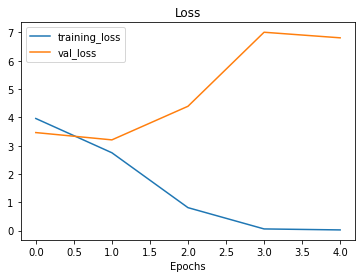

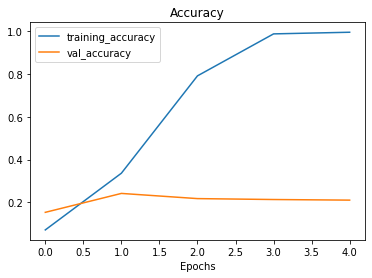

In [ ]:
plot_loss_curves(history2)

#DROPOUT LAYERS?

In [68]:
#0.21 WITHOUT DROPOUT
model_drop = Sequential([
    Conv2D(16, 3, activation = 'relu', input_shape = (224, 224, 3),kernel_regularizer=regularizers.l2(l=0.01)),
    MaxPool2D(),
    Conv2D(16,3, activation = 'relu', kernel_regularizer=regularizers.l2(l=0.01) ),
    MaxPool2D(),
    Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128),
    Dense(70, activation = 'softmax')
])

model_drop.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history_drop = model_drop.fit(train_data_dogs,
                      epochs=10,
                      steps_per_epoch = len(train_data_dogs),
                      validation_data = val_data_dogs,
                      validation_steps = len(val_data_dogs))

Epoch 1/10
249/249 [==============================] - 19s 75ms/step - loss: 4.9961 - accuracy: 0.0059 - val_loss: 4.3358 - val_accuracy: 0.0329
Epoch 2/10
249/249 [==============================] - 19s 76ms/step - loss: 4.3249 - accuracy: 0.0315 - val_loss: 4.2925 - val_accuracy: 0.0571
Epoch 3/10
249/249 [==============================] - 18s 72ms/step - loss: 4.1221 - accuracy: 0.0853 - val_loss: 4.1302 - val_accuracy: 0.0643
Epoch 4/10
249/249 [==============================] - 19s 74ms/step - loss: 3.4788 - accuracy: 0.2071 - val_loss: 4.1761 - val_accuracy: 0.0814
Epoch 5/10
249/249 [==============================] - 19s 78ms/step - loss: 2.3861 - accuracy: 0.4388 - val_loss: 4.7480 - val_accuracy: 0.0986
Epoch 6/10
249/249 [==============================] - 20s 80ms/step - loss: 1.2973 - accuracy: 0.7166 - val_loss: 5.4979 - val_accuracy: 0.1257
Epoch 7/10
249/249 [==============================] - 19s 76ms/step - loss: 0.5973 - accuracy: 0.8942 - val_loss: 6.7336 - val_accuracy:

## Data Augmentation!!


In [72]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

val_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

In [73]:
print('Augmented training images:')
train_data_dogs_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = IMG_SHAPE,
                                                                   batch_size = BATCH_SIZE,
                                                                   class_mode = 'categorical',
                                                                   shuffle = False)

print('Non augmented training images: ')
train_data_dogs = train_datagen.flow_from_directory(train_dir,
                                                    target_size = IMG_SHAPE,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical',
                                                    shuffle = False)

print('Non augmented validation images: ')
val_data_dogs = val_datagen.flow_from_directory(val_dir,
                                                  target_size = IMG_SHAPE,
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

print('Non augmented testing images: ')
test_data_dogs = test_datagen.flow_from_directory(test_dir,
                                                  target_size = IMG_SHAPE,
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = 'categorical',
                                                  shuffle = False)


Augmented training images:
Found 7946 images belonging to 70 classes.
Non augmented training images: 
Found 7946 images belonging to 70 classes.
Non augmented validation images: 
Found 700 images belonging to 70 classes.
Non augmented testing images: 
Found 700 images belonging to 70 classes.


In [74]:
images, labels = train_data_dogs.next()
augmented_images, augmented_labels = train_data_dogs_augmented.next()


(-0.5, 223.5, 223.5, -0.5)

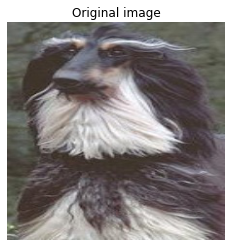

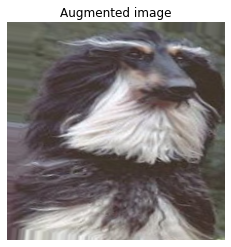

In [75]:
import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [59]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(16, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(16, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(70, activation = 'softmax')
])

model3.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history3 = model3.fit(train_data_dogs_augmented,
                      epochs=5,
                      steps_per_epoch = len(train_data_dogs_augmented),
                      validation_data = val_data_dogs,
                      validation_steps = len(val_data_dogs))

Epoch 1/5
 59/249 [======>.......................] - ETA: 1:12 - loss: 4.2855 - accuracy: 0.0011

KeyboardInterrupt: ignored

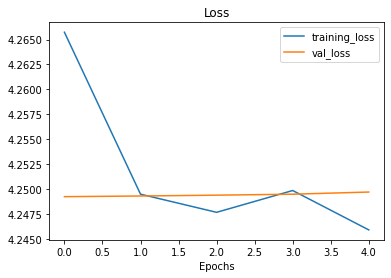

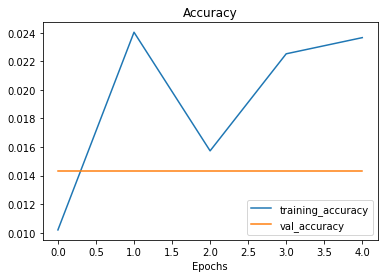

In [ ]:
plot_loss_curves(history3)

# +++ hyperparameter tuning

In [60]:
model4 = Sequential([
    # tf.keras.Input(shape = (224,224,3))
    tf.keras.layers.Conv2D(32,(3,3), input_shape = (224,224,3)),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3)),
    MaxPool2D((2,2)),
    Flatten(),
    tf.keras.layers.Dense(70, activation = 'softmax')
])

model4.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history4=model4.fit(train_data_dogs_augmented,
                    epochs=5,
                    steps_per_epoch = len(train_data_dogs_augmented),
                    validation_data = val_data_dogs,
                    validation_steps = len(val_data_dogs))

Epoch 1/5
 78/249 [========>.....................] - ETA: 1:04 - loss: 9.8567 - accuracy: 0.0065

KeyboardInterrupt: ignored

# Transfer Learning

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  print(f'Saving TensorBoard log files to {log_dir}')
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'


In [ ]:
def create_model(model_url, num_classes=70):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                          trainable=False,
                                          name='feature_extraction_layer',
                                          input_shape = IMG_SHAPE+(3,))
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])
  return model

In [ ]:
efficientnet_model = create_model(efficientnet_url, num_classes=70)
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])
efficientnet_history = efficientnet_model.fit(train_data_dogs,
                                              epochs=5,
                                              steps_per_epoch = len(train_data_dogs),
                                              validation_data = val_data_dogs,
                                              validation_steps = len(val_data_dogs),
                                              callbacks = [create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                                      experiment_name = 'efficientnet1')])


Saving TensorBoard log files to tensorflow_hub/efficientnet1/20221102-133514
Epoch 1/5
249/249 [==============================] - 31s 90ms/step - loss: 2.9406 - accuracy: 0.3851 - val_loss: 1.0910 - val_accuracy: 0.8543
Epoch 2/5
249/249 [==============================] - 22s 86ms/step - loss: 0.8022 - accuracy: 0.8413 - val_loss: 0.5695 - val_accuracy: 0.9129
Epoch 3/5
249/249 [==============================] - 21s 83ms/step - loss: 0.4636 - accuracy: 0.8919 - val_loss: 0.4353 - val_accuracy: 0.9443
Epoch 4/5
249/249 [==============================] - 22s 89ms/step - loss: 0.3449 - accuracy: 0.9148 - val_loss: 0.4102 - val_accuracy: 0.9429
Epoch 5/5
249/249 [==============================] - 25s 98ms/step - loss: 0.2662 - accuracy: 0.9357 - val_loss: 0.4048 - val_accuracy: 0.9343


In [ ]:
efficientnet_model.evaluate(test_data_dogs)

22/22 [==============================] - 3s 109ms/step - loss: 0.1300 - accuracy: 0.9614


[0.1299847811460495, 0.9614285826683044]

In [ ]:
efficientnet_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 70)                89670     
                                                                 
Total params: 4,139,234
Trainable params: 89,670
Non-trainable params: 4,049,564
_________________________________________________________________


##  TL + DataAugmentation

In [ ]:
efficientnet_model2 = create_model(efficientnet_url, num_classes=70)
efficientnet_model2.compile(loss='categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['accuracy'])
efficientnet_history2 = efficientnet_model2.fit(train_data_dogs_augmented,
                                              epochs=5,
                                              steps_per_epoch = len(train_data_dogs_augmented),
                                              validation_data = val_data_dogs,
                                              validation_steps = len(val_data_dogs),
                                              callbacks = [create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                                      experiment_name = 'efficientnet2')])


Saving TensorBoard log files to tensorflow_hub/efficientnet2/20221102-135347
Epoch 1/5
249/249 [==============================] - 103s 380ms/step - loss: 2.9006 - accuracy: 0.3782 - val_loss: 1.0575 - val_accuracy: 0.8300
Epoch 2/5
249/249 [==============================] - 91s 365ms/step - loss: 0.8426 - accuracy: 0.8275 - val_loss: 0.5775 - val_accuracy: 0.9100
Epoch 3/5
249/249 [==============================] - 93s 374ms/step - loss: 0.5220 - accuracy: 0.8757 - val_loss: 0.4751 - val_accuracy: 0.9214
Epoch 4/5
249/249 [==============================] - 89s 359ms/step - loss: 0.3944 - accuracy: 0.9001 - val_loss: 0.4316 - val_accuracy: 0.9329
Epoch 5/5
249/249 [==============================] - 89s 358ms/step - loss: 0.3433 - accuracy: 0.9057 - val_loss: 0.4287 - val_accuracy: 0.9314


#Evaluation
Evaluation in test set -> ~95.43%.


Evaluation with new images from internet 

In [ ]:
efficientnet_model2.evaluate(test_data_dogs)

22/22 [==============================] - 2s 78ms/step - loss: 0.1724 - accuracy: 0.9543


[0.17240944504737854, 0.954285740852356]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving descarga.jpg to descarga.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bulldog_test1.jpg to bulldog_test1.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving burzoi.jpg to burzoi.jpg


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Afghan' 'African Wild Dog' 'Airedale' 'American Hairless'
 'American Spaniel' 'Basenji' 'Basset' 'Beagle' 'Bearded Collie'
 'Bermaise' 'Bichon Frise' 'Blenheim' 'Bloodhound' 'Bluetick'
 'Border Collie' 'Borzoi' 'Boston Terrier' 'Boxer' 'Bull Mastiff'
 'Bull Terrier' 'Bulldog' 'Cairn' 'Chihuahua' 'Chinese Crested' 'Chow'
 'Clumber' 'Cockapoo' 'Cocker' 'Collie' 'Corgi' 'Coyote' 'Dalmation'
 'Dhole' 'Dingo' 'Doberman' 'Elk Hound' 'French Bulldog' 'German Sheperd'
 'Golden Retriever' 'Great Dane' 'Great Perenees' 'Greyhound'
 'Groenendael' 'Irish Spaniel' 'Irish Wolfhound' 'Japanese Spaniel'
 'Komondor' 'Labradoodle' 'Labrador' 'Lhasa' 'Malinois' 'Maltese'
 'Mex Hairless' 'Newfoundland' 'Pekinese' 'Pit Bull' 'Pomeranian' 'Poodle'
 'Pug' 'Rhodesian' 'Rottweiler' 'Saint Bernard' 'Schnauzer'
 'Scotch Terrier' 'Shar_Pei' 'Shiba Inu' 'Shih-Tzu' 'Siberian Husky'
 'Vizsla' 'Yorkie']


In [ ]:
def load_and_prep_image(filename, img_shape =224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)

  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img / 255.
  return img
bull = load_and_prep_image('bulldog_test1.jpg')

1/1 [==============================] - 0s 23ms/step


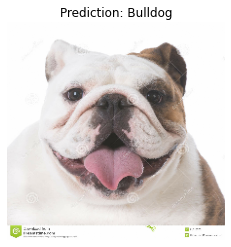

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[pred.argmax()]
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)
  
pred_and_plot(efficientnet_model2,'bulldog_test1.jpg', class_names)

1/1 [==============================] - 0s 26ms/step


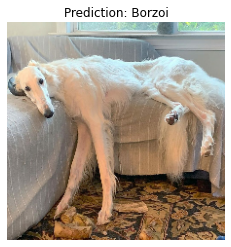

In [ ]:
burzoi = load_and_prep_image('burzoi.jpg')
pred_and_plot(efficientnet_model2, 'burzoi.jpg', class_names)

1/1 [==============================] - 0s 23ms/step


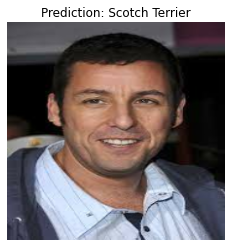

In [ ]:
adam = load_and_prep_image('descarga.jpg')
pred_and_plot(efficientnet_model2, 'descarga.jpg', class_names)